# Linear Discriminant Analysis



# Introduction

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be use as classifier. LDA is supervised tehcnique (requires labeled data).

*TODO* <font color='red'>TRY to find another images that enphasizes the new set of axes</font>


*TODO* <font color='red'>WRITE more here with practical and sinple explanantions</font>

In this notebook the practical aspect of LDA will be explained utilzing a 2 class problem for simplicity. 

## Small discussion about how LDA works (Can be skipped)

The of goal of (LDA) is to find best new set of axis that maximizes the distance between the means of the classes and also minimize overlap between the projected classes (confusion region). 

The figures below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{\pmb  x_1, \pmb x_2, ..., \pmb x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{\pmb x_{k_1}, \pmb x_{k_2}, ..., \pmb x_{n_k} \}$ of size $n_k$ for $k = 1,2$ where $\pmb x_{k_i} = (x_1,x_2,...,x_d)$.

In the figures can be seen the new proposed set of axes. The left figure, only the distance between the classes were maximized. As a end result there is overlapping region that can noticed in the histogram. The right figure is the LDA's results when not only the distance betwen the classes are maximized but also the overlapping region is minimized

*TODO* <font color='red'>REVIEW this asumption</font>
The assumption of LDA and Quadradict discriminant analsys is that each class can be modelled by multivariate gaussian.

$ 
N(\pmb x| \pmb \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{\Sigma}} \exp{\left[\frac{1}{2}(\pmb x- \pmb \mu)\Sigma^{-1}( \pmb x-\pmb \mu)^t\right]}
$



<img src="images/lda_0.png" width="700"/>

In order to that, Fisher proposed to maximize the ratio "scattter between classes/scatter within classes" that is expressed by the Cost function:

$
J(\pmb w) = \frac{\pmb w^{\mathsf{t}}S_{b}\pmb w}{\pmb w^{\mathsf{t}}S_{w} \pmb w}
$

where:

* $S_{b}=(\pmb m_2 − \pmb m_1)(\pmb m_2 − \pmb m_1)^t$ :  between-class covariance/satter matrix. (Can be understood as measure of between class spread)
    
* $S_{w} =  S_1 + S_2$ : within-class covariance/scatter matrices. (Can be understood as measure of within class spread or the sum of the covaraince matrix) 

$\pmb m_1$ and $\pmb m_2$ are the mean of each class. $S_1$ and $S_2$ are the covariance matrix of each class. 

$
S_k = \sum_{i\in X^{(k)}} (\pmb x_i^{(k)} - \pmb m_k) (\pmb x_i^{(k)} - \pmb m_k)^t  
$

The total scatter is given by the covariance matrix and should be *conserved* in the new set of axes:

$
S_T = \sum_{i=1}^2 \sum_{k=1}^{n_i}(x_k^{(i)} - \pmb m_i)(x_k^{(i)} - \pmb m_i)^t = S_W + S_B
$

Can be proved in  [here](refs/ea71fbef3b55b69e142897fadf43b3269463.pdf) and [here](refs/Dimensionality2.pdf) that maximize $J(\pmb w)$ is equivalent to find the solution of the eigenvalue problem for the matrix:

$
A =  S_{w}^{-1} S_b
$


$
A\pmb{v} =  \lambda\pmb{v}
$

where:
* $\pmb v$ is the eigenvector and define the new sets of axes
* $\lambda$ is the eigenvalue



### Principal Component Analysis vs. Linear Discriminant Analysis

"
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.
"

<img src="images/lda_1.png" width="700"/>


## Summarizing the LDA approach in 5 steps


1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices 
    * between-class: measure of dispersion between groups or classes
    * within-class scatter matrix: measure of dispersion in the class or group
3. Compute the eigenvectors $(\pmb e_1, \pmb e_2, ..., \pmb e_d)$ and corresponding eigenvalues $(\lambda_1, \lambda_2,..., \lambda_d)$ for the scatter matrices.
4. Sort the eigenvectors by eigenvalues an keep the k eigenvectors with the k-largest eigenvalues
5. Use the eigenvector matrix to transform the samples onto the new subspace. $Y = X*W$
    * $Y$ is nxk matrix
    * $X$ is nxd dimensional matrix. The input data
    * $W$ is dxk dimensional scatter matrix


In [19]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

,label,x,y
0,1,-0.969043,2.242124
1,1,0.586279,3.616839
2,1,0.458670,4.965189
3,1,-0.236519,5.079833
4,1,-0.659371,4.340085


,label,x,y
195,2,5.282196,0.994223
196,2,5.521123,-0.312177
197,2,5.738762,-0.190709
198,2,2.107080,-0.524498
199,2,6.691905,0.563293


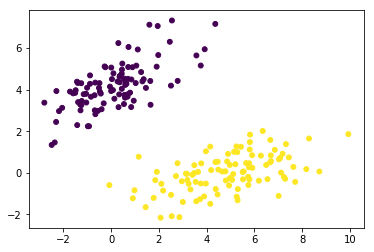

In [9]:
### Setup
# set random seed
rand.seed(42)

# 2 clusters
# not that both covariance matrices are diagonal
mu1 = [0, 4]
Sigma1 = [ [2, 1.0], [1.0, 1] ]

mu2 = [5, 0]
Sigma2 = [ [4, 1.3], [1.3, 1] ]

# generate samples
x1, y1 = np.random.multivariate_normal(mu1, Sigma11, 100).T
x2, y2 = np.random.multivariate_normal(mu2, Sigma12, 100).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
labels = ([1] * 100) + ([2] * 100)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

# inspect the data
df.head()
df.tail()

fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])

*TODO* <font color='red'>Move data generation to another notebook later</font>

does need to be here

In [3]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=[], ax=None):
    ax = ax or plt.gca()
    
    if len(label) > 0:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in gmm for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']

        draw_ellipse(pos, covar, alpha=w * w_factor)

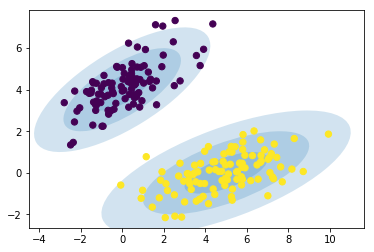

In [10]:
labels = df.label
X = df[['x','y']].values

initial_guess = [{ 'mu': np.asarray(mu1),
          'Covar': np.asarray(Sigma1),
          'w': 0.5 },  
          {'mu': np.asarray(mu2),
          'Covar': np.asarray(Sigma2),
          'w': 0.5}]

plot_gmm(initial_guess, X,label=labels)

In [ ]:
df.to_csv('bi_dimensional_n_bi_modal_data.csv', index=False)

## Total sum of squares

Total sum of squares

https://stats.stackexchange.com/questions/123490/what-is-the-correct-formula-for-between-class-scatter-matrix-in-lda?noredirect=1&lq=1

$
\begin{equation}
T = \sum_{ij} (x_{ij} - \bar x)^2 \\
S_W = \sum_{ij} (x_{ij} - \bar x_i)^2
\end{equation}
$

$
T = S_W + S_B
$

## Within-class scatter matrix SW


The **within-class** scatter matrix SW is computed by the following equation:

$
S_W = \sum\limits_{i=1}^{2}  S_i
$

$
S_i = \sum\limits_{\pmb x = 1}^{n_i} (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T
$

$
\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k
$


$
S_i = \frac{1}{N_{i}-1} \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T
$

In [33]:
## first class
X1 = df.loc[df.label ==1,['x','y']].values
X1.shape

x_bar1 = np.mean(X1,axis=0)

u1 = np.add(X1,-x_bar1).transpose()
u1.shape
u1.transpose().shape

S1 = np.matmul(u1,u1.transpose())*1.0/(X1.shape[0] - 1)

x_bar1
mu1 # true values

S1
Sigma1 # true values


## Second class
X2 = df.loc[df.label == 2,['x','y']].values
X2.shape

x_bar2 = np.mean(X2,axis=0)
u2 = np.add(X2,-x_bar2).transpose()
S2 = np.matmul(u2,u2.transpose())*1.0/(X2.shape[0] - 1)


x_bar2
mu2
S2
Sigma2

Sw = np.add(Sigma1, Sigma2)


(100, 2)

(2, 100)

(100, 2)

array([0.1309, 4.2042])

[0, 4]

array([[2.0546, 1.0737],
       [1.0737, 1.23  ]])

[[2, 1.0], [1.0, 1]]

(100, 2)

array([ 4.8263e+00, -1.4293e-03])

[5, 0]

array([[3.6626, 0.9117],
       [0.9117, 0.8228]])

[[4, 1.3], [1.3, 1]]

## Between-class scatter matrix SB

The **between-class** scatter matrix SB is computed by the following equation:


$
S_B =  \sum\limits_{i=1}^{2} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T
$

## Scatter Matrix A

**Porque desta matrix e nao o inverso dela ou diferenca ou mesma a multiplicacao das dias matriz !?**

Solving the generalized eigenvalue problem for the matrix 

$
A =  S_{W}^{-1} S_B
$


$
A\pmb{v} =  \lambda\pmb{v}
$

where:
* $\pmb v$ is the eigenvector
* $\lambda$ is the eigenvalue


## Run scikit learn with iris dataset

I could be more creative on that



*TODO* <font color='red'>Important to include a discussion about the histograms separation before and after LDA</font>

In [35]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [36]:
# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

In [37]:
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


In [44]:
## View the ratio of explained variance

lda_var_ratios = lda.explained_variance_ratio_

lda_var_ratios

array([0.9915])

In [42]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [45]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1